# Assessing Linear Regression Assumptions with a Statsmodel-Built Model

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset

In [2]:
final_df = pd.read_csv('flight_data.csv')

In [3]:
final_df.head(2)

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392


#### Checking Shape of dataset

In [4]:
print(final_df.shape)

(9045, 11)


#### Droping flightid column as it is of no use in prediction 

In [5]:
final_df.drop('filghtId',axis = 1, inplace = True)

print(final_df.shape)

(9045, 10)


#### Converting duration value into minutes example 13.25 = 13*60 + 25 = 805

In [6]:
final_df['duration'] = final_df['duration'].astype('string')

def calculate_duration(duration_str):
    hours, minutes = map(int, duration_str.split('.'))
    return hours * 60 + minutes

final_df['duration'] = final_df['duration'].apply(calculate_duration)

In [7]:
final_df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,805,46,69244
1,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,642,31,52392


# Univariate Analysis 

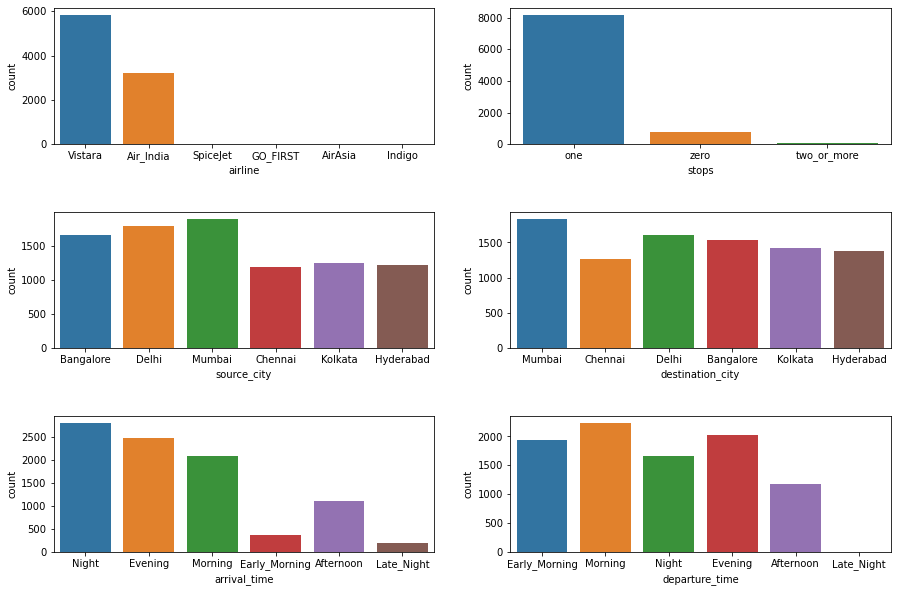

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(321)
sns.countplot(final_df['airline'])

plt.subplot(322)
sns.countplot(final_df['stops'])

plt.subplot(323)
sns.countplot(final_df['source_city'])

plt.subplot(324)
sns.countplot(final_df['destination_city'])

plt.subplot(325)
sns.countplot(final_df['arrival_time'])

plt.subplot(326)
sns.countplot(final_df['departure_time'])

plt.subplots_adjust(hspace=0.5)  # Adjust the height space between subplots

plt.show()

##### From above graphs we can infer that 
1. except Vistara and Air India other flights are very less in numbers 
2. count of two or more stops is very less 
3. in arrival_time count of early_morning and late_night is very less with respect to others 
4. in departure_time graph late_night count is very less if compared with others 

##### Actions 
1. we will merge this less occuring counts into other categories 

#### Doing value_counts on suspecious columns from above graph to validate our inference from graph 

In [9]:
for i in ['airline', 'stops', 'arrival_time', 'departure_time']:
    print('*'*25)
    print(final_df[i].value_counts())
    print('*'*25)
    print()

*************************
Vistara      5831
Air_India    3195
Indigo          6
GO_FIRST        5
SpiceJet        4
AirAsia         4
Name: airline, dtype: int64
*************************

*************************
one            8177
zero            771
two_or_more      97
Name: stops, dtype: int64
*************************

*************************
Night            2813
Evening          2477
Morning          2087
Afternoon        1100
Early_Morning     370
Late_Night        198
Name: arrival_time, dtype: int64
*************************

*************************
Morning          2241
Evening          2022
Early_Morning    1943
Night            1656
Afternoon        1179
Late_Night          4
Name: departure_time, dtype: int64
*************************



##### Merging above mentioned categories into more occuring category

In [10]:
final_df['airline'] = np.where(final_df['airline'].isin(['Vistara', 'Air_India']), final_df['airline'], 'Other')

final_df['stops'] = np.where(~final_df['stops'].isin(['one', 'zero']), 'one', final_df['stops'])

final_df['arrival_time'] = np.where(final_df['arrival_time'] == 'Early_Morning', 'Morning', final_df['arrival_time'])
final_df['arrival_time'] = np.where(final_df['arrival_time'] == 'Late_Night', 'Night', final_df['arrival_time'])

final_df['departure_time'] = np.where(final_df['departure_time'] == 'Late_Night', 'Night', final_df['departure_time'])

# Univariate Analysis of Numerical Columns

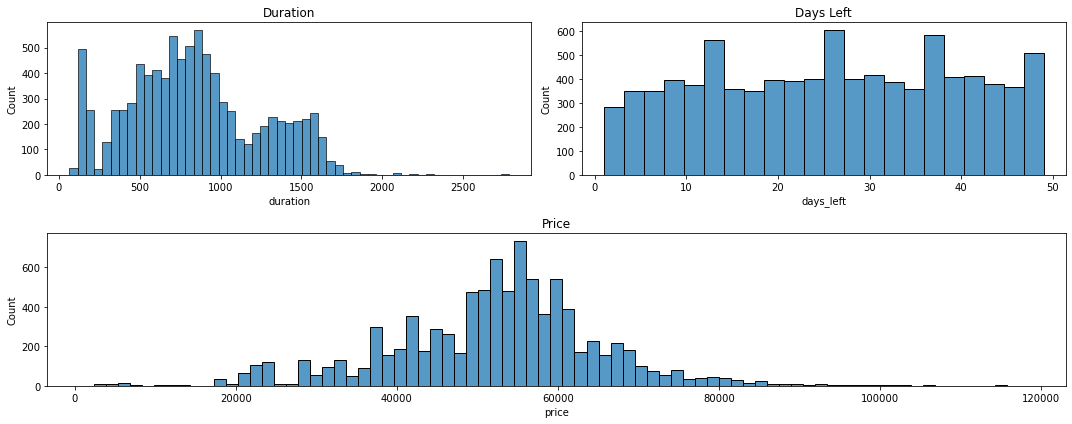

In [11]:
plt.figure(figsize=(15, 6))

plt.subplot(221)
sns.histplot(final_df['duration'])
plt.title('Duration')

plt.subplot(222)
sns.histplot(final_df['days_left'])
plt.title('Days Left')

plt.subplot(212)
sns.histplot(final_df['price'])
plt.title('Price')

plt.tight_layout()
plt.show()

#### Observation
1. Most of the flight in our dataset has duration between 500-1000
2. Most of the flight in our dataset has price between 45000 to 60000

<AxesSubplot:xlabel='duration', ylabel='price'>

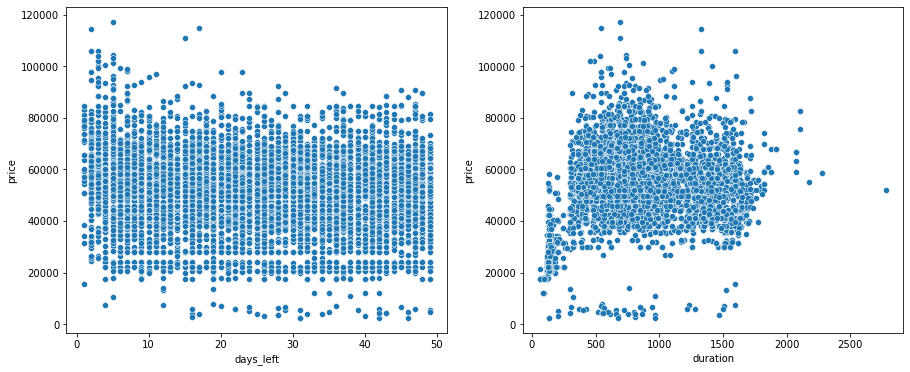

In [12]:
plt.figure(figsize = (15,6))

plt.subplot(121)
sns.scatterplot(final_df['days_left'], final_df['price'])

plt.subplot(122)
sns.scatterplot(final_df['duration'], final_df['price'])

#### Creating Heatmap 

<AxesSubplot:>

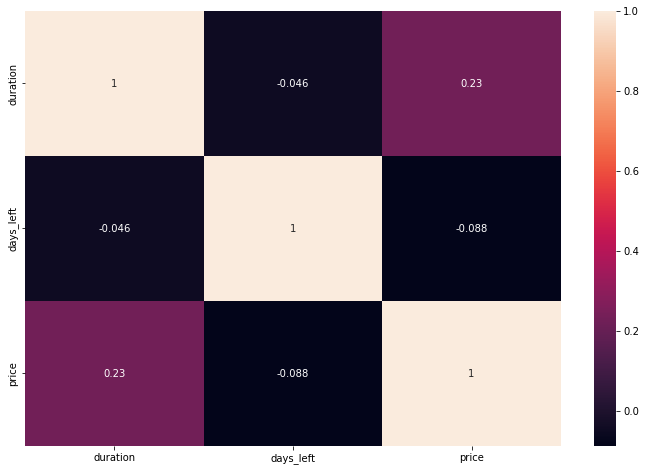

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(final_df.corr(), annot = True)

#### Extracting Dependant and Indepandent Variables 

In [14]:
X_sm = final_df.drop('price', axis = 1)
y_sm = final_df['price']

##### Droping flight variable because it has more than 200 categories so dropping it will reduce the curse of dimmensionality

In [15]:
X_sm.drop('flight', axis = 1, inplace = True)

#### splitting data into train and test

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7236, 8)
X_test shape: (1809, 8)
y_train shape: (7236,)
y_test shape: (1809,)


#### Performing one hot encoding for converting categorical variables into numerical variables 

In [17]:
column_names = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']

# Perform one-hot encoding for each categorical column in both X_train and X_test
one_hot_encoded_train = pd.get_dummies(X_train[column_names], prefix=column_names, drop_first=True)
one_hot_encoded_test = pd.get_dummies(X_test[column_names], prefix=column_names, drop_first=True)

# Drop the original categorical columns from both X_train and X_test
X_train_encoded = X_train.drop(column_names, axis=1)
X_test_encoded = X_test.drop(column_names, axis=1)

# Concatenate the one-hot encoded columns with the remaining columns in X_train and X_test
X_train_final = pd.concat([X_train_encoded, one_hot_encoded_train], axis=1)
X_test_final = pd.concat([X_test_encoded, one_hot_encoded_test], axis=1)

#### scalling numerical columns in our dataset for reducing the bad factor due to different scales of numerical variable

In [18]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [col for col in X_train_final.columns if col not in column_names]

scaler = StandardScaler()

# Fit and transform the scaler on the numerical columns in X_train_final
X_train_final[numerical_columns] = scaler.fit_transform(X_train_final[numerical_columns])

# Transform the numerical columns in X_test_final using the fitted scaler from X_train_final
X_test_final[numerical_columns] = scaler.transform(X_test_final[numerical_columns])

#### Building Linear Regression model with help of Statsmodels (for better visualization of stats)

In [19]:
import statsmodels.api as sm

X_lr = sm.add_constant(X_train_final)

# Fit the model (ordinary least squares linear regression)
model = sm.OLS(y_train, X_lr).fit()


X_test_scaled_const = sm.add_constant(X_test_final)

# Make predictions on test data using the fitted model
y_test_pred = model.predict(X_test_scaled_const)

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     320.7
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:42:29   Log-Likelihood:                -76401.
No. Observations:                7236   AIC:                         1.528e+05
Df Residuals:                    7213   BIC:                         1.530e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##### dropping columns which have p-values > 0.05 from above model 

In [20]:
X_train_final.drop(['source_city_Mumbai','arrival_time_Morning', 'destination_city_Chennai'], axis = 1, inplace = True)
X_test_final.drop(['source_city_Mumbai','arrival_time_Morning', 'destination_city_Chennai'], axis = 1, inplace = True)

##### Re-building our model after removing columns with high p-values 

In [21]:
import statsmodels.api as sm

X_lr = sm.add_constant(X_train_final)

# Fit the model (ordinary least squares linear regression)
model = sm.OLS(y_train, X_lr).fit()


X_test_scaled_const = sm.add_constant(X_test_final)

# Make predictions on test data using the fitted model
y_test_pred = model.predict(X_test_scaled_const)

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     370.7
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:43:01   Log-Likelihood:                -76405.
No. Observations:                7236   AIC:                         1.528e+05
Df Residuals:                    7216   BIC:                         1.530e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Checking performance of our model on train and test set

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Evaluate the training set
y_train_pred = model.predict(X_lr)
train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluate the test set
y_test_pred = model.predict(X_test_scaled_const)
test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}")

print("\nTest Set:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}")

Training Set:
MSE: 86888979.50, RMSE: 9321.43, R-squared: 0.49

Test Set:
MSE: 90533883.85, RMSE: 9514.93, R-squared: 0.50


#### Our model is giving R2 value of 0.50 on test sert and 0.49 on train set which means that it is only able to explain 49-50% of variation in our data hence it is a very poor model due to such a low R2 value , also it MSE and RMSE errors are very high 

#### Plotting our Regression line against given data

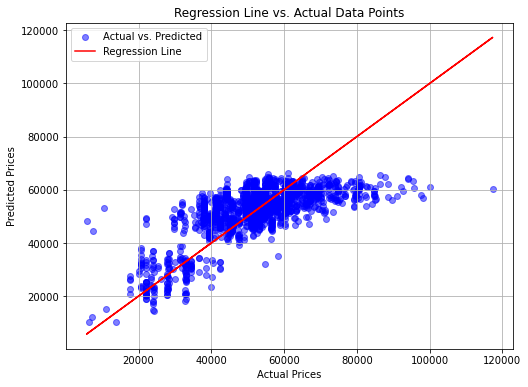

In [26]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual data points
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Actual vs. Predicted')

# Plotting the regression line
plt.plot(y_test, y_test, color='red', label='Regression Line')

# Labels and title
plt.title('Regression Line vs. Actual Data Points')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

##### From above figure we can easily see how our regression line is not even close to the real data

#### Our Model is giving really poor result when it is trained on Linear regression 
#### Action (so now we will be testing that is it satisfying those assumption of linear regression or not to prove that our dataset was not made for linear regression)

#### Assumption - 1
###### Linear Relationship between input and output

<AxesSubplot:xlabel='duration', ylabel='price'>

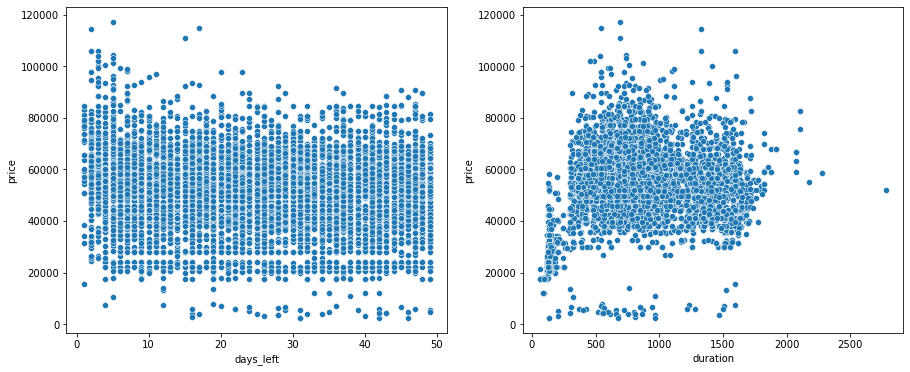

In [27]:
plt.figure(figsize = (15,6))

plt.subplot(121)
sns.scatterplot(final_df['days_left'], final_df['price'])

plt.subplot(122)
sns.scatterplot(final_df['duration'], final_df['price'])

###### From above graph we can clearly see that there is no linear relationship between input (duration and days_left) with output price hence not able to understand the exact pattern due to present of non linearity in data

#### Assumption - 2
###### No Multicolinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train_final.shape[1]):
    vif.append(variance_inflation_factor(X_train_final, i))

In [34]:
pd.DataFrame({'vif': vif}, index=X_train_final.columns)

,vif
duration,1.576311
days_left,1.007735
airline_Other,1.007225
airline_Vistara,1.044502
source_city_Chennai,1.186561
source_city_Delhi,1.342494
source_city_Hyderabad,1.232737
source_city_Kolkata,1.233218
departure_time_Early_Morning,2.187781
departure_time_Evening,2.316528


##### From above data we can see that VIF values for all the columns are less than 5 hence no multicolinearity exist between columns

#### Assumption - 3
###### Normality of Residual

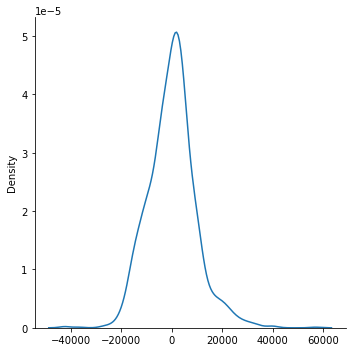

In [40]:
residual = (y_test - y_test_pred)
sns.displot(residual,kind='kde')

#### Above graph is showing that residuals are normally distributed hence satisfying assumption

#### Assumption - 3
###### Homoscedasticity (Having the same spread)

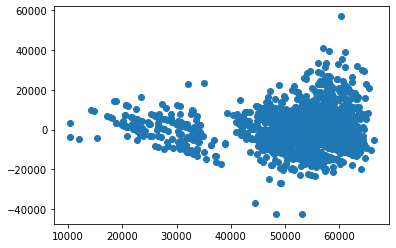

In [41]:
plt.scatter(y_test_pred,residual)

##### From above graph we can see that scatter is not uniform hence do not meet this assumption

#### Assumption - 5
###### Autocorrelation of Residuals

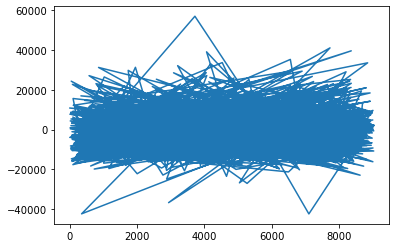

In [42]:
plt.plot(residual)

In [44]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_stat = durbin_watson(residual)
print(f"Durbin-Watson Statistic: {durbin_watson_stat}")

Durbin-Watson Statistic: 2.028523931955316


##### The Durbin-Watson statistic measures the presence of autocorrelation (or lack thereof) in the residuals of a regression analysis. It ranges from 0 to 4, with values around 2 indicating no significant autocorrelation.

### Result
Although it is meeting few assumptions of linear regression still not able to show good result while performing Linear regression because it is not having linear relation between input and output hence not capturing the true essence of data with Linear regression models